In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

# Модели с абсолютными величинами

In [242]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [243]:
df[['name', 'grade', 'num_tokens', 'num_acl', 'num_acl_relcl', 
'num_advcl', 'num_sents', 'num_cl', 'num_tu', 'num_coord', 
'poss', 'prep_ph', 'adj_n', 'ger_inf', 'part_n', 'num_vp',
'av_depth', 'min_depth', 'max_depth', 'num_ctu', 'mean_l_sim', 
'mean_length_s', 'mean_length_c', 'mean_p_sim', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [244]:
df.head()

,h,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,...,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,nan
0,AAl_13_1\tbest\t283\t5\t1\t3\t11\t23\t23\t8\t2...,AAl_13_1,best,283,5,1,3,11,23,23,...,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82,
1,AAl_27_1\tbest\t211\t0\t0\t1\t10\t14\t14\t5\t2...,AAl_27_1,best,211,0,0,1,10,14,14,...,5.0,3,10,0,23.96,20,15.0714,19.56,5.6,
2,AAl_30_1\tbest\t231\t2\t1\t1\t13\t19\t19\t4\t1...,AAl_30_1,best,231,2,1,1,13,19,19,...,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46,
3,ZEv_3_1\tbest\t201\t4\t3\t2\t8\t14\t14\t7\t18\...,ZEv_3_1,best,201,4,3,2,8,14,14,...,4.75,3,7,0,26.89,24,14.3571,21.68,4.75,
4,EEm_14_1\tbest\t219\t4\t0\t6\t9\t18\t18\t3\t19...,EEm_14_1,best,219,4,0,6,9,18,18,...,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78,


In [245]:
df = df.drop(['h','nan'], axis=1)

In [246]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,num_vp,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,19,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,12,5.0,3,10,0,23.96,20,15.0714,19.56,5.6
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,23,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,14,4.75,3,7,0,26.89,24,14.3571,21.68,4.75
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,22,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78


In [247]:
def best_non(row):
    if row['grade'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [248]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,2,8,0,32.36,24.64,12.3043,26.07,7.82,nonworst,best
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,3,10,0,23.96,20,15.0714,19.56,5.6,nonworst,best
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,2,5,0,20.36,16.69,12.1579,16.58,6.46,nonworst,best
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,3,7,0,26.89,24,14.3571,21.68,4.75,nonworst,best
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,4,7,0,24.75,23.22,12.1667,20.03,5.78,nonworst,best


In [249]:
df_best_non = df.drop(['grade', 'name', 'mark_worst_nonworst'], axis=1)

In [15]:
df_best_non.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,poss,prep_ph,...,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_best_nonbest
0,283,5,1,3,11,23,23,8,21,33,...,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82,best
1,211,0,0,1,10,14,14,5,25,44,...,5.0,3,10,0,23.96,20,15.0714,19.56,5.6,best
2,231,2,1,1,13,19,19,4,13,37,...,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46,best
3,201,4,3,2,8,14,14,7,18,32,...,4.75,3,7,0,26.89,24,14.3571,21.68,4.75,best
4,219,4,0,6,9,18,18,3,19,37,...,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78,best


In [18]:
df_best_non.shape

(95, 24)

In [16]:
y = df_best_non.values[:, df_best_non.shape[1]-1]

In [17]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'non

In [19]:
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

# Корреляция признаков

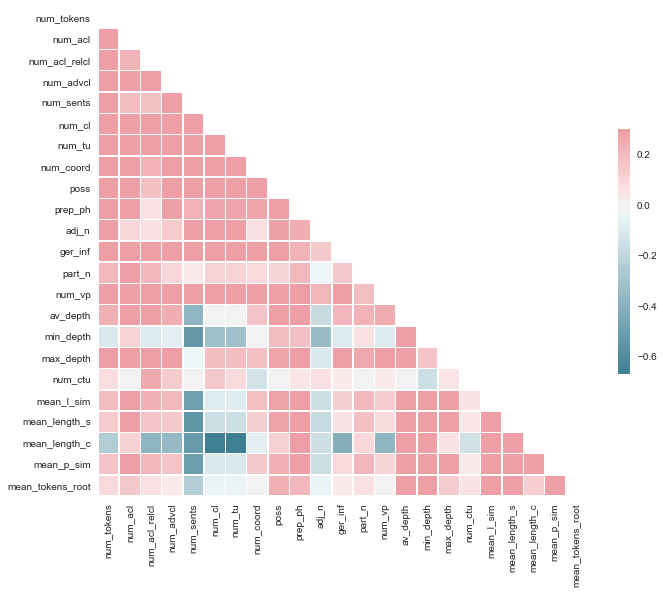

In [23]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

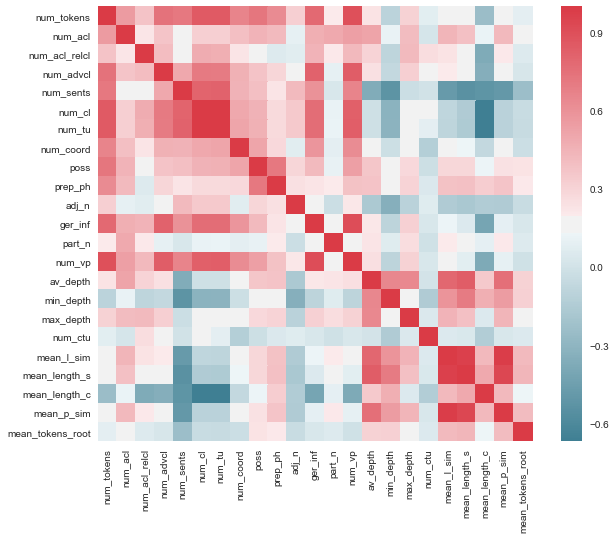

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Разделение на тестовую и тренировочную выборку

In [25]:
from sklearn.model_selection import StratifiedKFold

**Примерно:**

Всего: 95 эссе (38 (40%) best; 57 (60%) nonbest)

Тестовая выборка (20%): 19(8 (40%) best; 11 (60%) nonbest)

Тренировочная выборка (80%): 76(30 (40%) best; 46 (60%) nonbest)

In [26]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

5

In [27]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 50 51 52 53 54 55 56 57 58 59 60 61]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 62 63 64 65 66 67 68 69 70 71 72]
T

# Дерево решений

In [28]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
y_pred = clf1.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.56      0.71      0.63         7
    nonbest       0.78      0.64      0.70        11

avg / total       0.69      0.67      0.67        18



In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

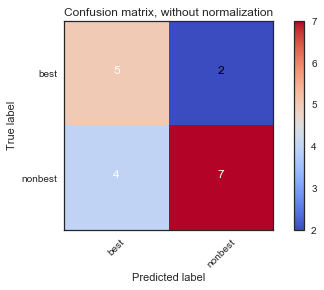

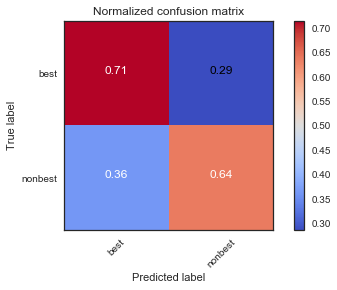

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [33]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.67


# Дерево решений с выбором лучших гиперпараметров

In [38]:
X_df_best_non.shape[1]

23

In [40]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [41]:
clf1.best_params_

{'max_depth': 8, 'max_features': 2}

In [42]:
y_pred = clf1.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



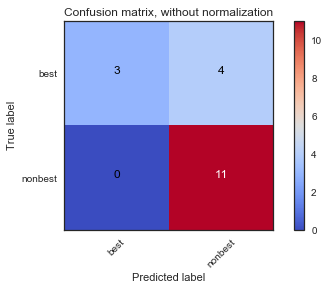

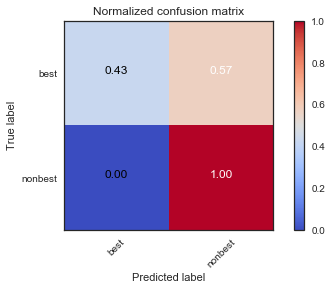

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [45]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


In [46]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=4, max_features=6) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

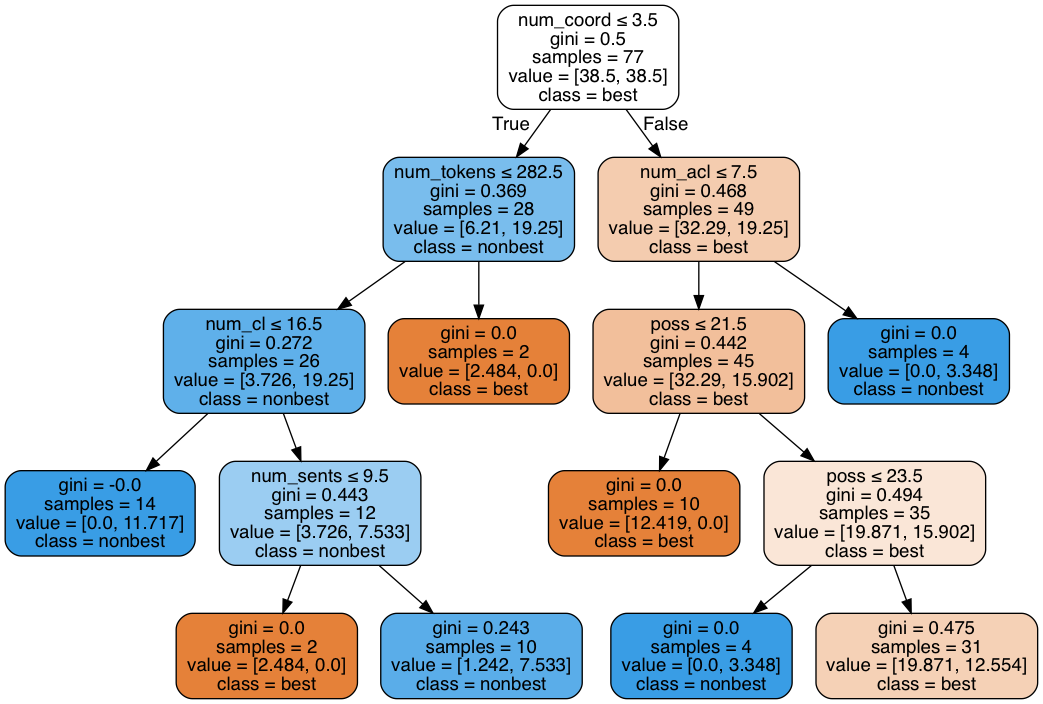

In [48]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=['best', 'nonbest'],
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [49]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
y_pred = clf2.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



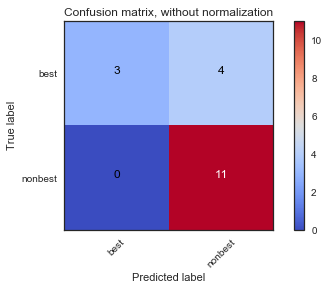

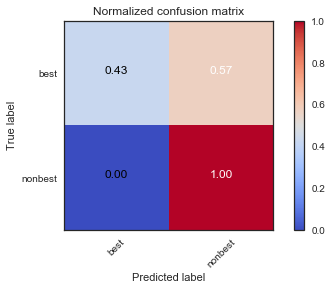

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [53]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


# RandomForestClassifier с выбором лучших гиперпараметров

In [65]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

In [66]:
y_test_1

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

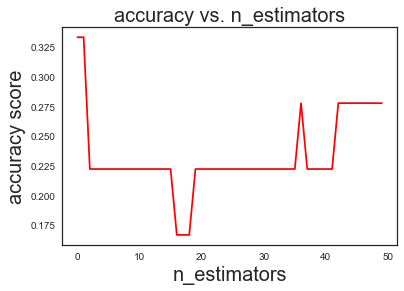

In [71]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [85]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 23), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [86]:
clf2.best_params_

{'max_depth': 7, 'max_features': 1}

In [87]:
y_pred = clf2.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



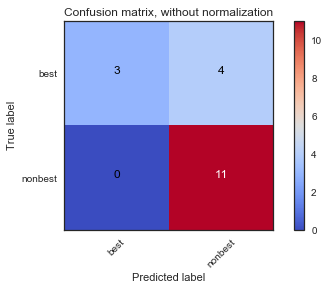

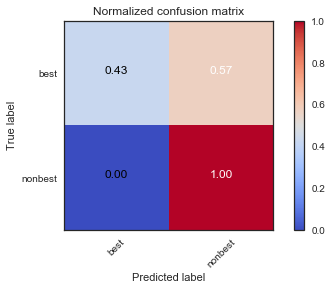

In [89]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [90]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


# LogisticRegression c важными признаками ('l1')

In [91]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
y_pred = clf3.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.29      0.44         7
    nonbest       0.69      1.00      0.81        11

avg / total       0.81      0.72      0.67        18



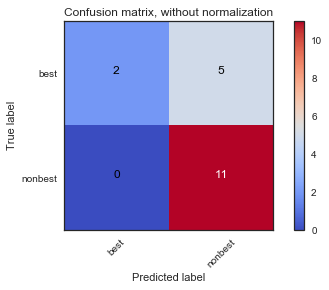

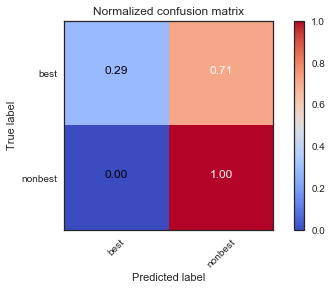

In [94]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [95]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.72


# LogisticRegression с лучшими гиперпараметрами

In [97]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
y_pred = clf3.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



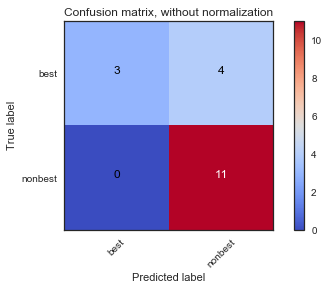

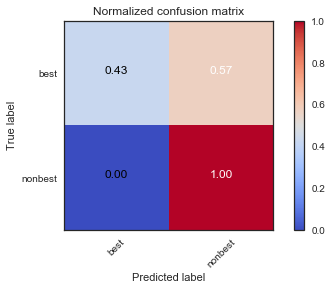

In [100]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [101]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


# Разделение на три класса

In [102]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,2,8,0,32.36,24.64,12.3043,26.07,7.82,nonworst,best
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,3,10,0,23.96,20,15.0714,19.56,5.6,nonworst,best
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,2,5,0,20.36,16.69,12.1579,16.58,6.46,nonworst,best
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,3,7,0,26.89,24,14.3571,21.68,4.75,nonworst,best
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,4,7,0,24.75,23.22,12.1667,20.03,5.78,nonworst,best


In [103]:
df_three = df.drop(['name', 'mark_best_nonbest', 'mark_worst_nonworst'], axis=1)

In [104]:
df_three.head()

,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,poss,...,num_vp,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root
0,best,283,5,1,3,11,23,23,8,21,...,19,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82
1,best,211,0,0,1,10,14,14,5,25,...,12,5.0,3,10,0,23.96,20,15.0714,19.56,5.6
2,best,231,2,1,1,13,19,19,4,13,...,23,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46
3,best,201,4,3,2,8,14,14,7,18,...,14,4.75,3,7,0,26.89,24,14.3571,21.68,4.75
4,best,219,4,0,6,9,18,18,3,19,...,22,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78


In [105]:
y = df_three.values[:, 0]

In [106]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'worst', 'worst',
       'worst', 'worst', 'worst', 'worst', 'worst', 'worst', 'worst',
       'worst', 'worst', 'worst', 'worst', 'worst', 'worst', 'worst',
       'worst'], dtype=object)

In [107]:
X_three = df_three.drop(['grade'], axis=1)
X_three[X_three.columns] = X_three[X_three.columns].astype(float)
X = X_three.values[:, 0:X_three.shape[1]]

In [108]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

5

In [109]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 78 79 80 81]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 46 47 48 49 50 51 52 53 82 83 84 85]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 54 55 56 57 58 59 60 61 86 87 88]
T

# LogisticRegression c важными признаками ('l1')

In [110]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
y_pred = clf3.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.50      0.50      0.50         8
       best       0.43      0.43      0.43         7
      worst       1.00      1.00      1.00         3

avg / total       0.56      0.56      0.56        18



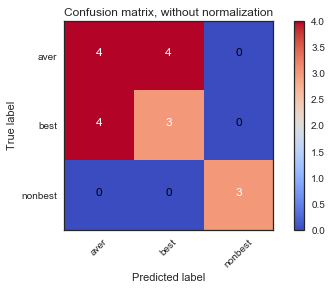

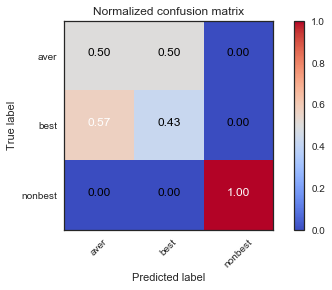

In [116]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [117]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.56


# LogisticRegression с лучшими гиперпараметрами

In [118]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
y_pred = clf3.predict(X_test)

In [120]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.50      0.50      0.50         8
       best       0.43      0.43      0.43         7
      worst       1.00      1.00      1.00         3

avg / total       0.56      0.56      0.56        18



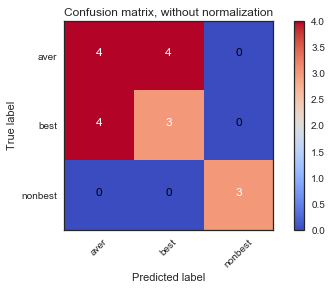

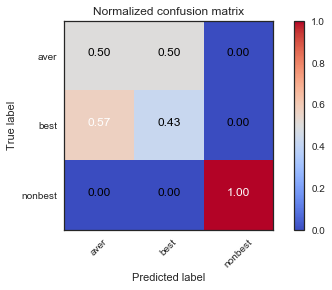

In [122]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [123]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.56


# Дерево решений

In [124]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
y_pred = clf1.predict(X_test)

In [126]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.25      0.25      0.25         8
       best       0.14      0.14      0.14         7
      worst       1.00      1.00      1.00         3

avg / total       0.33      0.33      0.33        18



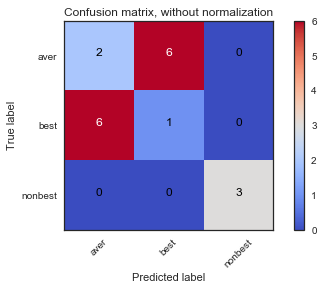

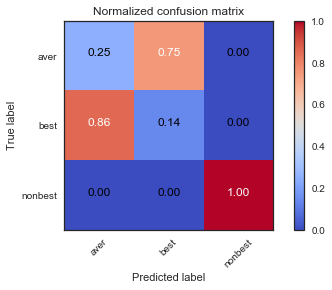

In [128]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [129]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.33


# Дерево решений с выбором лучших гиперпараметров

In [135]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
y_pred = clf1.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.00      0.00      0.00         8
       best       0.47      1.00      0.64         7
      worst       0.67      0.67      0.67         3

avg / total       0.29      0.50      0.36        18



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


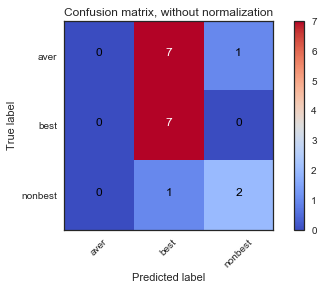

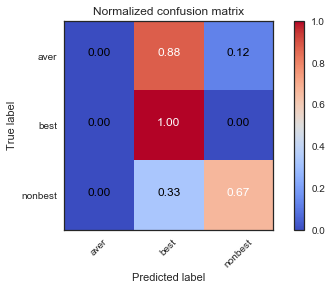

In [139]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [140]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.5


In [ ]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=['best', 'nonbest'],
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [141]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
y_pred = clf2.predict(X_test)

In [143]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.56      0.62      0.59         8
       best       0.57      0.57      0.57         7
      worst       1.00      0.67      0.80         3

avg / total       0.64      0.61      0.62        18



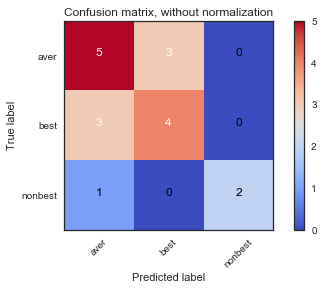

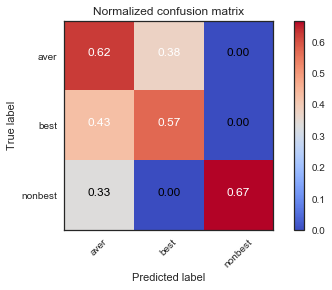

In [144]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [145]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.61


# RandomForestClassifier с выбором лучших гиперпараметров

In [146]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    elif x == 'worst':
        y_test_1.append(0)
    else:
        y_test_1.append(2)

In [147]:
y_test_1

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0]

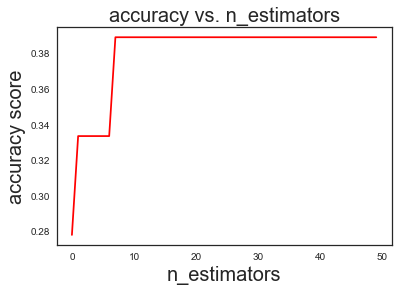

In [148]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [150]:
parameters = {
    'max_features': range(1, X_three.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 23), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [151]:
y_pred = clf2.predict(X_test)

In [152]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.50      0.75      0.60         8
       best       0.33      0.14      0.20         7
      worst       1.00      1.00      1.00         3

avg / total       0.52      0.56      0.51        18



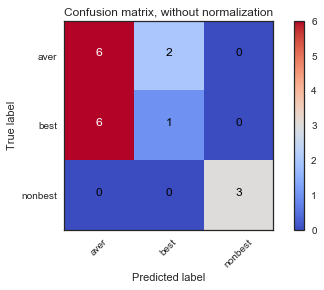

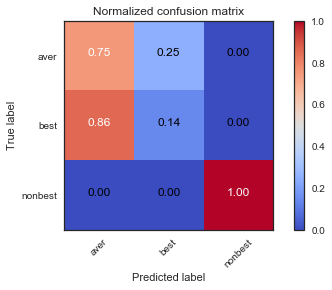

In [153]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['aver', 'best', 'nonbest'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [154]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.56


# Worst vs nonworst

In [210]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,2,8,0,32.36,24.64,12.3043,26.07,7.82,nonworst,best
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,3,10,0,23.96,20,15.0714,19.56,5.6,nonworst,best
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,2,5,0,20.36,16.69,12.1579,16.58,6.46,nonworst,best
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,3,7,0,26.89,24,14.3571,21.68,4.75,nonworst,best
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,4,7,0,24.75,23.22,12.1667,20.03,5.78,nonworst,best


In [211]:
df_worst_non = df.drop(['grade', 'name', 'mark_best_nonbest'], axis=1)

In [212]:
y = df_worst_non.values[:, df_worst_non.shape[1]-1]

In [213]:
y

array(['nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonwor

In [214]:
X_worst = df_worst_non.drop(['mark_worst_nonworst'], axis=1)
X_worst[X_worst.columns] = X_worst[X_worst.columns].astype(float)
X = X_worst.values[:, 0:X_worst.shape[1]]

In [215]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

2

In [216]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 47 essays ): [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 87 88 89 90 91 92 93 94] TEST ( 48 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 78 79 80 81 82 83 84 85 86]
TRAIN ( 48 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 78 79 80 81 82 83 84 85 86] TEST ( 47 essays ): [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 87 88 89 90 91 92 93 94]


# Дерево решений

In [226]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   nonworst       0.91      0.77      0.83        39
      worst       0.36      0.62      0.45         8

avg / total       0.82      0.74      0.77        47



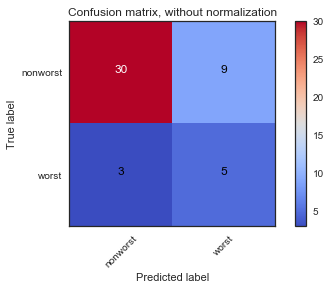

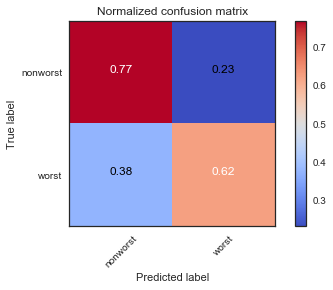

Accuracy:  0.74


In [227]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Дерево решений с подбором лучших гиперпараметров

In [228]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.89      0.82      0.85        39
      worst       0.36      0.50      0.42         8

avg / total       0.80      0.77      0.78        47



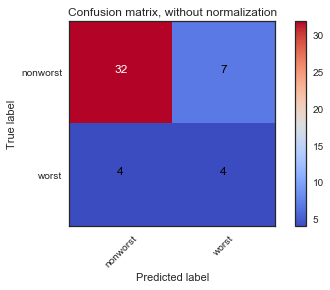

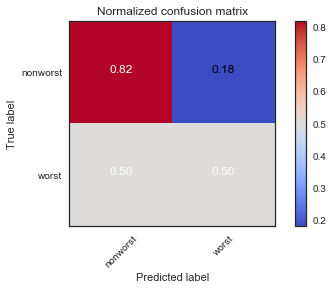

Accuracy:  0.77


In [229]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier

In [230]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.87      0.87      0.87        39
      worst       0.38      0.38      0.38         8

avg / total       0.79      0.79      0.79        47



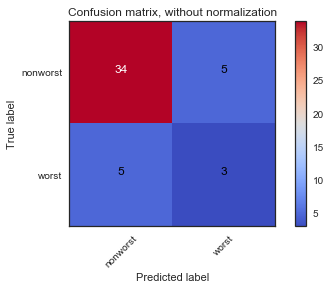

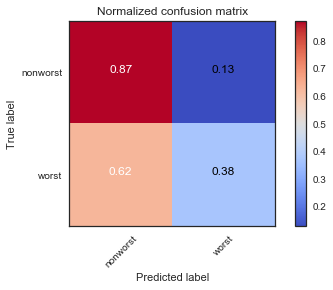

Accuracy:  0.79


In [231]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier c выбором лучших гиперпараметров

In [232]:
y_test_1 = []
for x in y_test:
    if x == 'worst':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

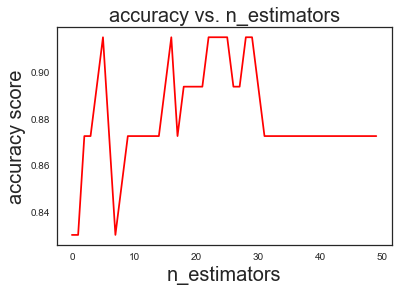

In [233]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [234]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=35, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 23), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.94      0.82      0.88        39
      worst       0.46      0.75      0.57         8

avg / total       0.86      0.81      0.82        47



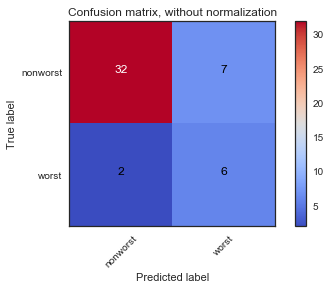

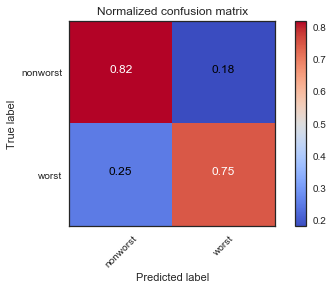

Accuracy:  0.81


In [235]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# LogisticRegression c важными признаками ('l1')

In [237]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.94      0.85      0.89        39
      worst       0.50      0.75      0.60         8

avg / total       0.87      0.83      0.84        47



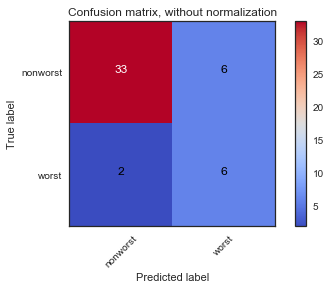

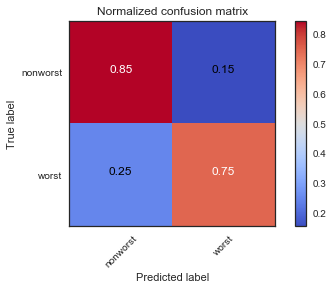

Accuracy:  0.83


In [238]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# LogisticRegression с лучшими гиперпараметрами

In [239]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

   nonworst       0.94      0.85      0.89        39
      worst       0.50      0.75      0.60         8

avg / total       0.87      0.83      0.84        47



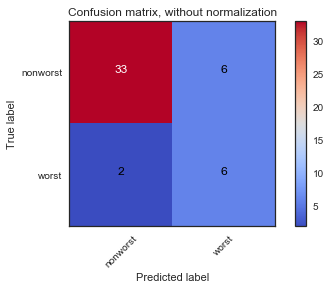

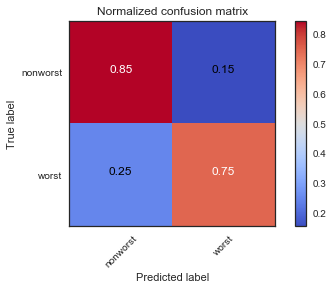

Accuracy:  0.83


In [240]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['nonworst', 'worst'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Важность признаков

In [ ]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(20,10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'])
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [ ]:
imp(clf2, X_new_df.columns)

# С большим количсетвом признаков

In [ ]:
#df[['name', 'grade', 'num_acl', 'num_acl_relcl', 'num_advcl', 'num_tokens', 'num_sents', 'num_cl', 'num_tu',
#                'num_coord', 'num_np', 'num_vp', 'av_depth', 'min_depth',
#    'max_depth', 'num_ctu', 'mean_l_sim', 'mean_p_sim', 'mean_tokens_root',
#    'mean_length_s', 'mean_length_c', 'c_s', 'c_t', 'acl_t', 'acl_relcl_t',
#    'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl', 'coord_cl',
#    't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'vp_s', 'nan']] = df['h'].str.split('\t',expand=True)

In [ ]:
df.head()

In [ ]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/itogmore.csv',
                       sep=';', encoding='utf-8')

In [ ]:
df.columns

In [ ]:
new_df = df.drop(['Name', 'mark', 'type', 'avdepth', 'complex_tunit',
                  'acl', 'noun+part', 'noun+adj', 'ger_inf_as_subj'], axis=1)

In [ ]:
y = new_df.values[:, 0]
X_new_df = new_df.drop(['mark2'], axis=1)
X_new_df[X_new_df.columns] = X_new_df[X_new_df.columns].astype(int)

In [ ]:
X_new_df.shape

In [ ]:
X = X_new_df.values[:, 0:X_new_df.shape[1]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(1)

In [ ]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(100):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [ ]:
parameters = {
    'max_features': range(1, X_new_df.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

In [ ]:
y_pred = clf2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), 
            annot=True)
plt.title("Confusion matrix")
plt.show()

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
imp(clf2, X_new_df.columns)

In [ ]:
#'name', 'grade', 'num_tokens', 'num_acl', 'num_acl_relcl', 
#'num_advcl', 'num_sents', 'num_cl', 'num_tu', 'num_coord', 
#'poss', 'prep_ph', 'adj_n', 'ger_inf', 'part_n', 'num_vp',
#'av_depth', 'min_depth', 'max_depth', 'num_ctu', 'mean_l_sim', 
#'mean_length_s', 'mean_length_c', 'mean_p_sim', 'mean_tokens_root'